# How taxi times and departure delays of flights are affected by airport, airline and time of travel
## by Yasir Gani

## Investigation Overview

> I am a keen plane enthusiast, I love to track them as they fly past my house, I love to see them close-up even more and I love to fly in them the most! So, whenever I travel, I want the opportunity to see planes up close from the tarmac. That makes me a pretty unusual individual I know, but there is one thing I share with all the general public - I hate delays!

> In this investigation, my aim was to determine which airlines, airports and flight times would cause me departure delays, but which combination of those categories would give me the longest taxi times to the runway, hence the most viewing time of planes from the tarmac!

> All from the perspective of domestic air traffic in and out of the state of New York (NY), in 2018.



## Dataset Overview

> The dataset contains information on domestic flights in and out of NY in 2018. Data includes the departure and origin airport, the departure and arrival times, the time of year, the taxi times to and from the runway, the airlines (in 2-digit IATA codes), as well as five different delay types: carrier_delay, weather_delay, nas_delay, security_delay and late_aircraft_delay.

> This data was filtered for cancelled flights and those which were delayed by more than 24 hours, to prevent extreme factors becoming an increasing bearing in the further causes of any on-time performances.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_master = pd.read_csv('df_master.csv')

In [3]:
#filter the master dataset for delays > 24hrs

df_master = df_master[(df_master['dep_delay'] <= 1440) | (df_master['arr_delay'] <= 1440)]

In [4]:
#remove duplicate instances of flights (which were previously there because of multiple types of delays)

df_master_unique = df_master.drop_duplicates(subset=['month','day_of_month','day_of_week','fl_date',
                                      'op_unique_carrier','origin','dest',
                                      'dep_delay','dep_del15','taxi_out','taxi_in',
                                      'arr_delay','arr_del15','cancelled','diverted','actual_elapsed_time',
                                      'air_time','distance'])

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Busiest departure times

> Most flights flying into, or leaving NY departed in the morning or afternoon, with fewer leaving in the evening and very little leaving at night. This may be down to air traffic regulations prohibiting low flying aircraft very late in the evening and in the small hours of the night.

>Note: time of day is defined as follows:
- Morning - 6am to 12pm
- Afternoon - 12pm to 6pm
- Evening - 6pm to 12am
- Night - 12am to 6am

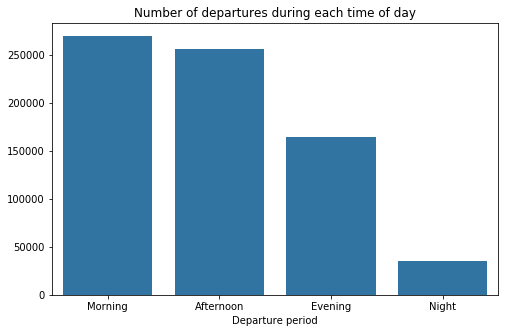

In [5]:
#plot countplot for categorical data

plt.figure(figsize=[8,5])
color = sb.color_palette()[0]
time_period = ['Morning', 'Afternoon', 'Evening', 'Night']
sb.countplot(data = df_master_unique, x = 'dep_period', color=color, order=time_period)
plt.title('Number of departures during each time of day')
plt.xlabel('Departure period')
plt.ylabel('');

## Air traffic per airline

> Through analysis, the busiest airlines in and out of NY were found to be Delta, JetBlue, Endeavour, American, Republic and SouthWest, respectively. Together, these six airlines accounted for over 75% of domestic air traffic around NY in 2018.

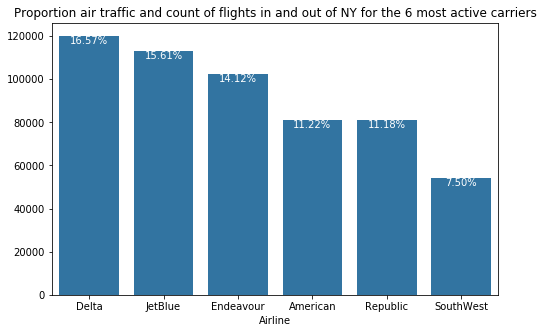

In [6]:
#plot relative frequency graph of carriers
plt.figure(figsize=[8,5])
color = sb.color_palette()[0]
carriers = ['DL','B6','9E','AA','YX','WN']
sb.countplot(data = df_master_unique, x = 'op_unique_carrier', color = color, order=carriers)
plt.xlabel('Airline')
plt.ylabel('')
plt.title('Proportion air traffic and count of flights in and out of NY for the 6 most active carriers')

# add annotations
n_points = df_master_unique.shape[0]
cat_counts = df_master_unique['op_unique_carrier'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.2f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', va='top', color = 'w')

plt.xticks(np.arange(6),('Delta', 'JetBlue','Endeavour','American','Republic','SouthWest'));

## Domestic air traffic per airport

> New York's JFK International was not the busiest airport for domestic traffic in NY, in fact it was LaGuardia. It accounted for over 160,000 flights in and another 160,000 flights out of NY airports in 2018. This, compared to JFK's 120,000+ flights in and out of NY airports. Buffalo airport was ranked third busiest.

In [7]:
#filtering for airports in NY only

ny = ['JFK','BUF','ALB','HPN','LGA','ROC','SYR','ELM','ISP','ITH']

#filter df_master_unique for departures and arrivals in and out of NY
ny_dep = df_master_unique[df_master_unique['origin'].isin(ny)]
ny_arr = df_master_unique[df_master_unique['dest'].isin(ny)]

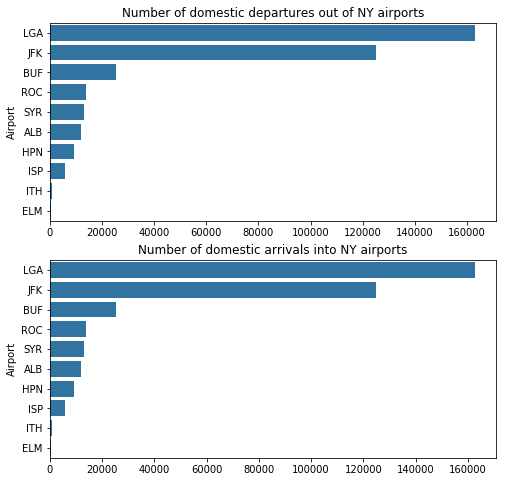

In [8]:
#plot the countplots for each airport for departures and arrivals

fig, ax = plt.subplots(nrows=2, figsize = [8,8])
airports_dep = ny_dep['origin'].value_counts().index
airports_arr = ny_arr['dest'].value_counts().index

#plot first graph
sb.countplot(data = ny_dep, y = 'origin', color=color, order=airports_dep, ax=ax[0])
ax[0].set_title('Number of domestic departures out of NY airports')
ax[0].set_xlabel('')
ax[0].set_ylabel('Airport')

#plot second graph
sb.countplot(data = ny_arr, y = 'dest', color=color, order=airports_arr, ax=ax[1])
ax[1].set_title('Number of domestic arrivals into NY airports')
ax[1].set_xlabel('')
ax[1].set_ylabel('Airport');

## Types of delay

> The data contained the five main types of delay: carrier delay, weather delay, NAS delay (airspace delay), security delay and late aircraft delay.

> It was found that airspace and late aircraft delays were most prevalent in numbers overall, with the summer holiday months of July and August particularly encountering many delays of these types.

> It could be argued that these months would be best not to travel if you wanted to avoid delays, instead travelling around February when overall numbers of each type of delay were much lower, and there was only a moderate risk of weather delay, versus January.

> However, I might also want to avoid flying Delta due to the amount of delays it encountered in 2018. Interestingly, JetBlue had the most weather delays, indicating it might be risk-averse when bad weather hits. Perhaps this makes them a safer prospect to fly with, given that they may choose not to fly until severe weather passes.

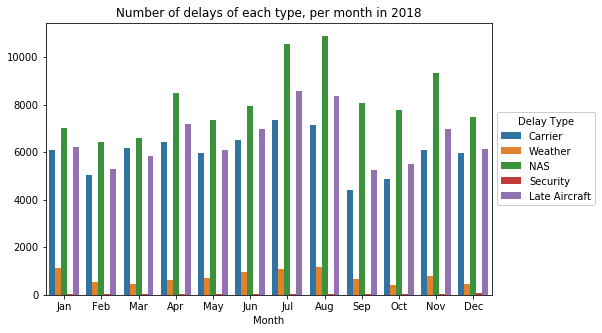

In [9]:
#setting a list of labels for delay type
my_labels = ['Carrier', 'Weather', 'NAS', 'Security', 'Late Aircraft']
my_airlines = ['Delta', 'JetBlue','Endeavour','American','Republic','SouthWest']



#plot effect of month of year on the number of delays of each type

plt.figure(figsize=[8,5])

#defining the months of the year
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
sb.countplot(data = df_master, x = 'month', hue = 'delay_type', order = months)
plt.xlabel('Month')
plt.ylabel('')
plt.title('Number of delays of each type, per month in 2018')
plt.legend(bbox_to_anchor=(1, 0.5), loc = 6, ncol = 1, framealpha = 1, title = 'Delay Type', labels=my_labels);


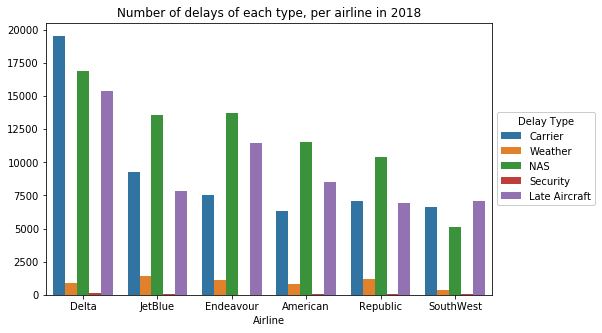

In [10]:
#plot the effect of airline on the number of delays of each type

plt.figure(figsize=[8,5])

#defining the airlines order
airline_del = df_master['op_unique_carrier'].value_counts().index[:6]
ax = sb.countplot(data = df_master, x = 'op_unique_carrier', hue = 'delay_type', order = airline_del)
ax.set_xlabel('Airline')
ax.set_ylabel('')
ax.set_xticklabels(my_airlines)
ax.set_title('Number of delays of each type, per airline in 2018')
ax.legend(bbox_to_anchor=(1, 0.5), loc = 6, ncol = 1, framealpha = 1, title = 'Delay Type', labels=my_labels);

## Delays (mins) by airline and airport, per delay type

> Where a delay type was given it was found that some of the longest delays were caused by weather delays. While this cannot be avoided sometimes, the data previously showed we can avoid flying in January, July or August, when weather delays are high in count, to potentially avoid this pitfall.

> However, it was also found that Delta had some of the longest security delays, followed by Endeavour. JetBlue suffered only short security delays and was the second best at carrier delay performance. Its late aircraft delay performane was moderate however, compared to the other five most active airlines.

> Perhaps Delta may not seem the best option due to the number of delays they encounter, plus security delays are some of the longest with them. However, on the flip side it could be argued that security is paramount to them, making them safer to fly with.

> It would be interesting to explore why, while airport operations could be the cause behind security delays, that airlines such as JetBlue have smaller delays than Delta and Endeavour.

In [11]:
ordered_airlines = ['DL','B6','9E','AA','YX','WN']
top_airlines_data = ny_dep[ny_dep['op_unique_carrier'].isin(ordered_airlines)]

In [12]:
top_airlines_data.head()

,Unnamed: 0,actual_elapsed_time,air_time,arr_del15,arr_delay,arr_period,cancelled,day_of_month,day_of_week,delay_type,...,dep_period,dest,distance,diverted,fl_date,month,op_unique_carrier,origin,taxi_in,taxi_out
76,270,115.0,46.0,1.0,87.0,Morning,0,8,Mon,carrier_delay,...,Morning,JFK,209,0,2018-08-01,Jan,9E,SYR,36.0,33.0
77,271,107.0,49.0,1.0,169.0,Morning,0,9,Tue,carrier_delay,...,Morning,JFK,209,0,2018-09-01,Jan,9E,SYR,9.0,49.0
78,274,182.0,140.0,1.0,175.0,Night,0,12,Fri,carrier_delay,...,Evening,DSM,1031,0,2018-12-01,Jan,9E,LGA,5.0,37.0
79,275,182.0,136.0,1.0,141.0,Night,0,17,Wed,carrier_delay,...,Evening,DSM,1031,0,2018-01-17,Jan,9E,LGA,6.0,40.0
83,282,212.0,171.0,1.0,19.0,Evening,0,5,Fri,carrier_delay,...,Evening,RSW,1080,0,2018-05-01,Jan,9E,LGA,5.0,36.0


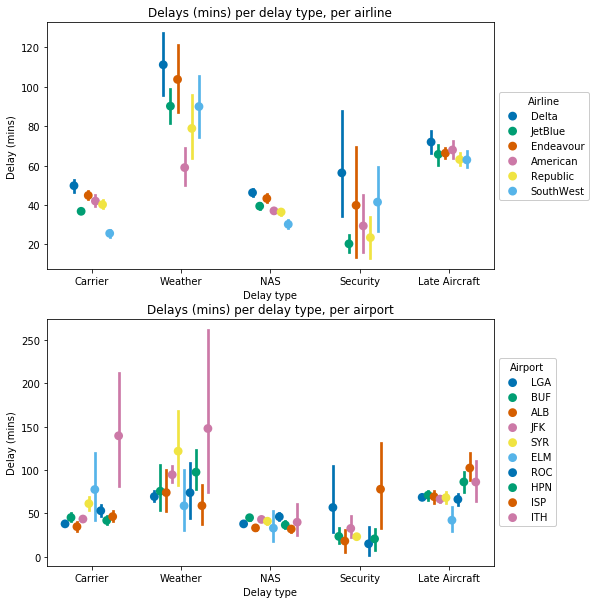

In [13]:
#plot the mean delay in mins, per delay type, per airline and airport
plt.figure(figsize=[8,10])

plt.subplot(2,1,1)
ax1 = sb.pointplot(data = top_airlines_data, x = 'delay_type', y = 'delay_type_mins', hue = 'op_unique_carrier',
           palette = 'colorblind', linestyles = '', dodge = 0.4, hue_order = ordered_airlines)
ax1.set_title('Delays (mins) per delay type, per airline')
ax1.set_yticklabels([],minor = True)
ax1.set_xlabel('Delay type')
ax1.set_ylabel('Delay (mins)')
ax1.set_xticklabels(my_labels)
leg_handles = ax1.get_legend_handles_labels()[0]
ax1.legend(leg_handles, my_airlines, bbox_to_anchor=(1, 0.5), loc = 6, ncol = 1, framealpha = 1, title='Airline')


plt.subplot(2,1,2)
ax2 = sb.pointplot(data = ny_dep, x = 'delay_type', y = 'delay_type_mins', hue = 'origin',
           palette = 'colorblind', linestyles = '', dodge = 0.6)
ax2.set_title('Delays (mins) per delay type, per airport')
ax2.set_yticklabels([],minor = True)
ax2.set_xlabel('Delay type')
ax2.set_ylabel('Delay (mins)')
ax2.set_xticklabels(my_labels)
ax2.legend(bbox_to_anchor=(1, 0.5), loc = 6, ncol = 1, framealpha = 1, title = 'Airport');

## Departure delays (mins) for airlines based at different airports

> Departure delays are classified as when the plane releases its brakes to be pushed back from its boarding gate.

> Looking at the heatmap for this plot, four airports stuck out with average departure delays. These included JFK and LaGuardia, both expected as they saw higher air traffic than the rest of the airports in 2018. However, ALbany (ALB) and Westchester (HPN) stuck out with some high average departure delays for JetBlue, which was surprising as they do not rank next in departure traffic behind JFK and LaGuardia.

> Looking at this data, in 2018 a departure delay with JetBlue would have cost you more time on average flying out of LaGuardia, with American costing the least time on averge, out of the same airport. However Endeavour Air also showed consistent delays across each airport, on average.

> Given this data, it might be worth avoiding JetBlue out of Albany or Rochester, or WestJet out of LaGuardia.

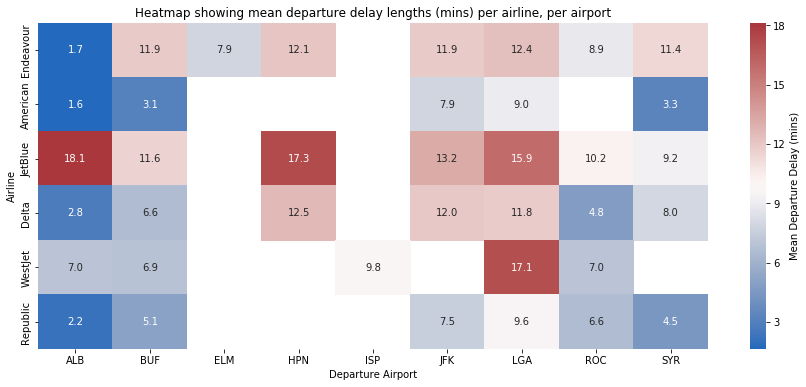

In [14]:
#heatmap to show the mean departure delays per month, per airline for the top 6 most active airlines

cat_means = ny_dep.groupby(['origin','op_unique_carrier'], as_index=False).mean()
cat_means = cat_means[cat_means['op_unique_carrier'].isin(ordered_airlines)]
cat_means1 = cat_means.pivot(index = 'op_unique_carrier', columns = 'origin',
                            values = 'dep_delay')
cat_order = ['Endeavour','American','JetBlue','Delta','WestJet','Republic']

plt.figure(figsize=[15,6])
sb.heatmap(cat_means1, annot = True, fmt = '.1f',
           cbar_kws = {'label' : 'Mean Departure Delay (mins)'}, cmap='vlag', yticklabels = cat_order)
plt.xlabel('Departure Airport')
plt.ylabel('Airline')
plt.yticks(va='center')
plt.title('Heatmap showing mean departure delay lengths (mins) per airline, per airport');

## Taxi times to runway (mins) for airlines based at different airports

> Looking at this heatmap I was able to determine that taxi times to the runway were clearly longer at the larger airports. JFK and LaGuardia showed the highest average taxi time in minutes regardless of which airline you flew on.

> Therefore if I wanted to maximise my taxi time and potentially savour the views from my window seat onboard my flight, I'd be best off choosing to fly from either JFK or LaGuardia. Of the six most active carriers, I would get 21 minutes at a minimum (on average), going up to 30.8 minutes. Endeavour showed the highest averages in this heatmap.

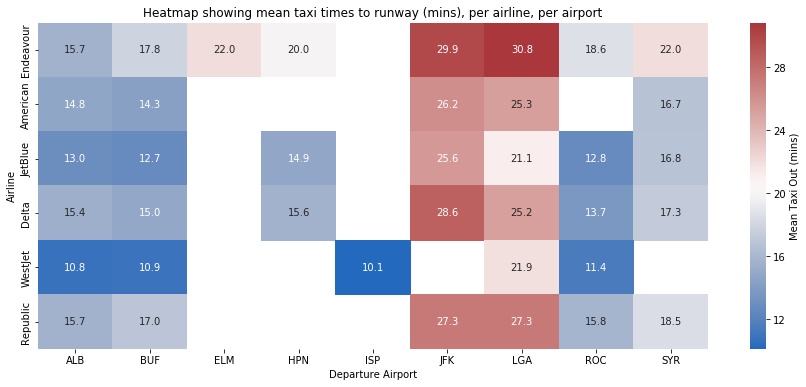

In [15]:
#heatmap to show the mean taxi out times per month, per airline for the top 6 most active airlines
cat_means2 = cat_means.pivot(index = 'op_unique_carrier', columns = 'origin',
                            values = 'taxi_out')

plt.figure(figsize=[15,6])
sb.heatmap(cat_means2, annot = True, fmt = '.1f',
           cbar_kws = {'label' : 'Mean Taxi Out (mins)'}, cmap='vlag', yticklabels = cat_order)
plt.xlabel('Departure Airport')
plt.ylabel('Airline')
plt.yticks(va='center')
plt.title('Heatmap showing mean taxi times to runway (mins), per airline, per airport');

## Taxi times to runway (mins) for airports per time of day

> To round off my investigation I looked at how different airports perform with taxi times to the runway. Interestingly, despite air traffic being lower in the evening period than morning/afternoon, JFK showed a significant increase in mean taxi time to the runway.

> This may be explained by the fact that JFK is a large international airport connecting passengers to the world. Therefore, while domestic air traffic may reduce in the evening, international air traffic might possibly increase, causing domestic flights to wait longer before taking off. This is just speculation, of course.

> LaGuardia was consistent with taxi times from morning through to evening, despite air traffic reducing. Elmira (ELM) airport also showed a sharp increase in mean taxi time in the evening, so it is worth further investigation why this is the case.

In [16]:
#how time of day affects departure delay times and taxi times per airport for the six most active airlines

#filter for top airlines
means_day = ny_dep[ny_dep['op_unique_carrier'].isin(carriers)]

#find the mean departure delay time per carrier, per month
means_day = means_day.groupby(['dep_period','origin'], as_index=False).mean()



In [17]:
#define function to plot multivariate barplot for dep delays and taxi times per airport per time of day
def m_barplot_2(y,l,t):
    plt.figure(figsize=[24,5])
    ax = sb.barplot(data = means_day, x = 'dep_period', y = y, hue = 'origin', order=time_period, palette='colorblind')
    ax.legend(bbox_to_anchor=(1, 0.5), loc = 6, ncol = 1, framealpha = 1, title = 'Airport', prop={'size': 15})
    plt.xlabel('Time of day', fontsize=15)
    plt.ylabel(l, fontsize=15)
    plt.title(t, fontsize=15);

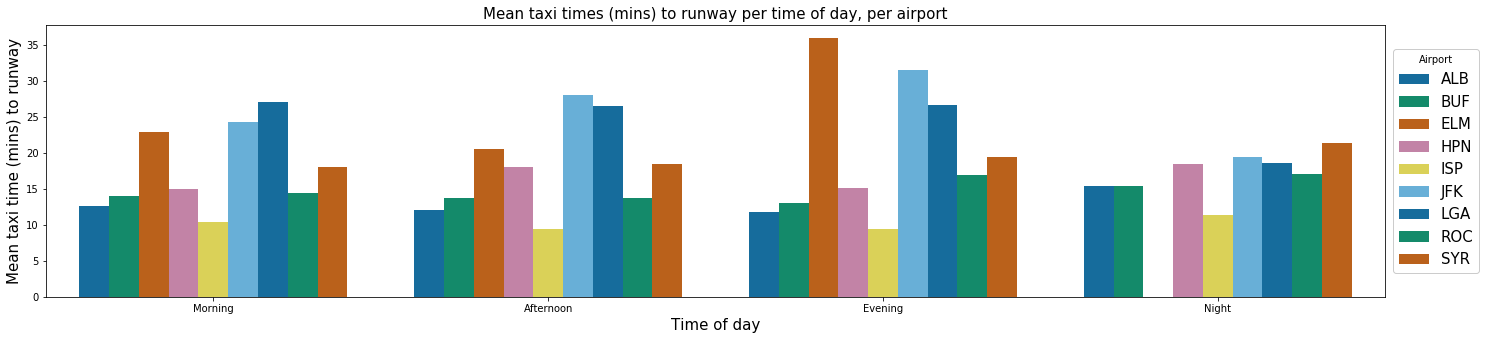

In [18]:
#countplot to show taxi times to runway per airport for each time of day
m_barplot_2(y='taxi_out', l='Mean taxi time (mins) to runway', t='Mean taxi times (mins) to runway per time of day, per airport');

## Conclusion

> If I want to avoid the frustrating delays when flying out of NY, perhaps I would avoid Delta. While so many additional factors play a part in the timeliness of air transport, such as the aircraft type and passenger loads, based on the data in this dataset it could be argued that Delta is best avoided. I may also want to avoid flying during the months of July and August to avoid carrier and late aircraft delays. But also I want to be careful of weather delays as they caused some of the longest delays in 2018.

> Departure delays were highest on average amongst JetBlue, Delta and Endeavour. However, it would have been good to avoid WestJet flying out of LaGuardia too.

> Finally, if I wanted to maximise my plane-watching satisfaction, I would definitely want to fly out of LaGuardia or JFK. Not only did they see most domestic air traffic in 2018, they also had the longest average taxi times to the runway, flying out of NY. With all variables considered, perhaps if I wanted to really maximise my time watching planes on the ground from my window seat onboard my flight, I'd have tried to fly Endeavour out of LaGuardia in the morning.



## Suggestion...

> On the other hand, I could take the chance to fly out of JFK in the evening and spend a little longer potentially seeing some 'heavies' in action in the evening...this is just speculation and data would be needed to back up this hypothesis!

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!